In [1]:
import pandas as pd
import allel
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_merge = pd.read_csv('df_merged.csv')

# Figure 2a - Sensitivity

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

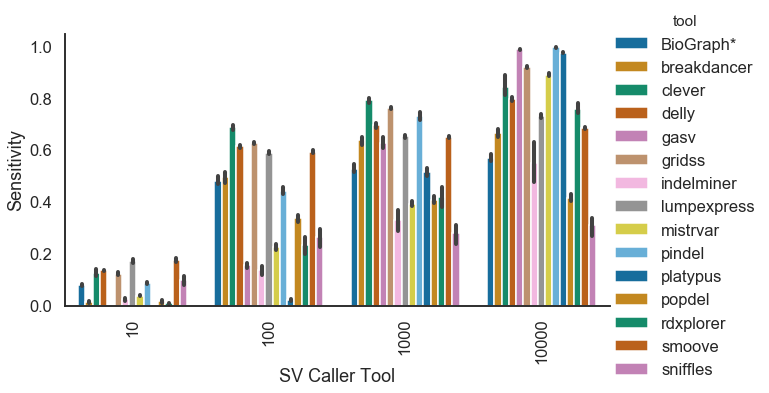

In [21]:
fig2a=sns.set_style("white")
fig2a=sns.set_context("talk")
fig2a = sns.catplot(x="threshold", y="sensitivity", kind="bar",data = df_merge,hue="tool",aspect=1.8, palette="colorblind")
fig2a.set(xlabel='SV Caller Tool', ylabel='Sensitivity')
fig2a=sns.despine()
plt.xticks(rotation=90)
#plt.show(fig2a)

# Figure 2b - Precision

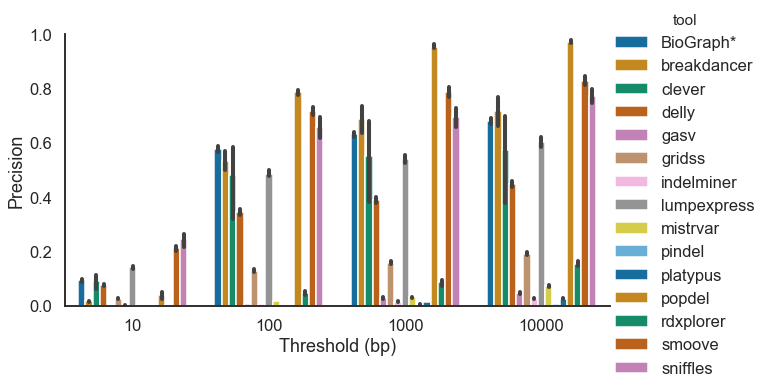

In [16]:
fig2b=sns.set_style("white")
fig2b=sns.set_context("talk")
fig2b = sns.catplot(x="threshold", y="precision", kind="bar",data = df_merge,hue='tool',aspect=1.8, palette="colorblind")
plt.ylim(0, 1)
fig2b.set(xlabel='Threshold (bp)', ylabel='Precision')
fig2b=sns.despine()
#plt.show(fig2b)

# Figure 2c - Specificity

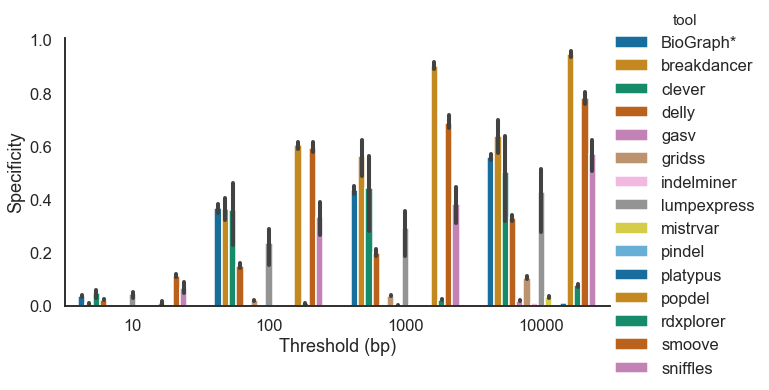

In [14]:
fig2c=sns.set_style("white")
fig2c=sns.set_context("talk")
fig2c = sns.catplot(x="threshold", y="specificity", kind="bar",data = df_merge,hue='tool',aspect=1.8, palette="colorblind")
fig2c.set(xlabel='Threshold (bp)', ylabel='Specificity')
fig2c=sns.despine()
#plt.show(fig2c)

# Figure 2d - F-score

(-0.1, 1)

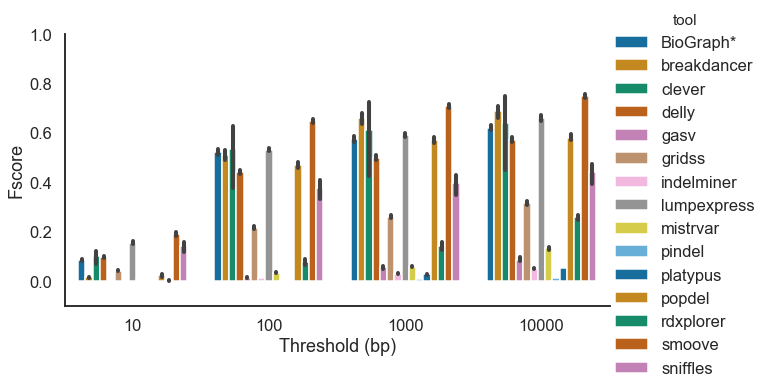

In [18]:
fig2d=sns.set_style("white")
fig2d=sns.set_context("talk")
fig2d = sns.catplot(x="threshold", y="f-score", kind="bar",data = df_merge,hue='tool',aspect=1.8, palette='colorblind')
fig2d.set(xlabel='Threshold (bp)', ylabel='Fscore')
fig2d=sns.despine()
plt.ylim(-0.1, 1)
#plt.show(fig2d)

In [7]:
df_mean=df_merge.groupby(['tool','threshold'],as_index=False).mean()
df_mean.head()

,tool,threshold,Unnamed: 0,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score
0,BioGraph*,10,175.428571,42.428571,411.142857,15.428571,542.714286,500.285714,0.078281,0.093773,0.035971,0.085301
1,BioGraph*,100,176.428571,261.000000,192.571429,111.714286,542.714286,281.714286,0.481218,0.576129,0.366554,0.524250
2,BioGraph*,1000,177.428571,286.285714,167.285714,129.714286,542.714286,256.428571,0.527502,0.631530,0.435937,0.574669
3,BioGraph*,10000,178.428571,309.000000,144.571429,184.571429,542.714286,233.714286,0.569452,0.681937,0.561175,0.620445
4,breakdancer,10,179.428571,8.285714,497.714286,4.142857,542.714286,534.428571,0.015434,0.016424,0.008264,0.015859


# Figure 2e

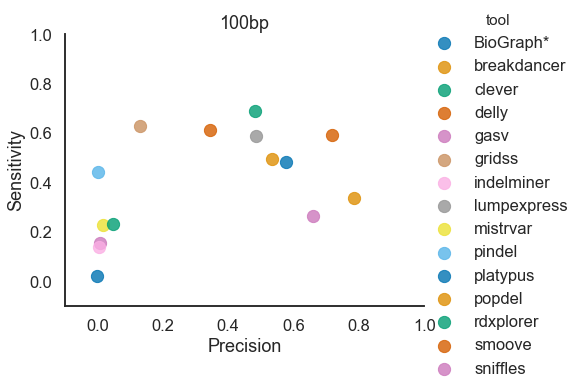

In [19]:
for th in [100]:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='precision', y='sensitivity', hue='tool',fit_reg=False,aspect=1.3,scatter_kws={"s": 150}, palette='colorblind')
    g.set(xlabel='Precision', ylabel='Sensitivity')
    plt.title(str(th)+"bp")
    g=plt.xlim(-0.1, 1)
    g=plt.ylim(-0.1, 1)
    g=sns.despine()

# Figure 2f

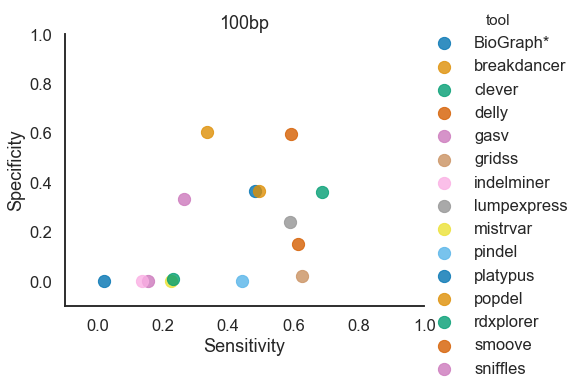

In [20]:
for th in [100]:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='sensitivity', y='specificity', hue='tool',fit_reg=False,aspect=1.3,scatter_kws={"s": 150}, palette='colorblind')
    g.set(xlabel='Sensitivity', ylabel='Specificity')
    plt.title(str(th)+"bp")
    g=plt.xlim(-0.1, 1)
    g=plt.ylim(-0.1, 1)
    g=sns.despine()